## Redes Neuronales

Cargas librerías

In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install keras


Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: keras in c:\python311\lib\site-packages (2.12.0)




[notice] A new release of pip available: 22.3 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [41]:
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
import pickle
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics.cluster import contingency_matrix
import numpy as np

Lectura de datos

In [97]:
df= pd.read_csv('./df1.csv')

In [98]:
df

,Anion gap,Bicarbonate,Leucocyte,Urea nitrogen,Blood calcium,Urine output,RDW,INR,Blood potassium,heart rate,Renal failure,outcome
0,0.346185,0.238714,0.116783,0.285453,0.179679,0.244331,0.243564,0.017208,0.509346,0.329339,1,0
1,0.254886,0.591427,0.195514,0.095760,0.344118,0.161565,0.128005,0.101003,0.406542,0.655616,0,0
2,0.178313,0.508892,0.083217,0.182233,0.368627,0.274943,0.691648,0.010516,0.792056,0.364244,1,0
3,0.303270,0.738714,0.125677,0.063485,0.653394,0.993197,0.291762,0.240280,0.388785,0.586711,0,0
4,0.452209,0.262654,0.135086,0.240694,0.478431,0.505102,0.246315,0.101003,0.500000,0.320134,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1171,0.716007,0.426813,0.118219,0.272665,0.840336,0.215337,0.204483,0.043977,0.716956,0.643126,1,0
1172,0.610892,0.218988,0.343528,0.186344,0.899654,0.215337,0.388173,0.109943,0.426168,0.788700,1,0
1173,0.390361,0.459644,0.141200,0.160311,0.415686,0.013379,0.306397,0.030593,0.308411,0.167689,1,0
1174,0.483133,0.330882,0.092227,0.192738,0.349020,0.293084,0.230593,0.082218,0.306075,0.575679,1,0


In [111]:
target = ['outcome']
X = df.iloc[:,~df.columns.isin(target)].values
y = df.outcome

In [112]:
# Separar los datos de cada clase
X_class_0 = X[y == 0]
X_class_1 = X[y == 1]
y_class_0 = y[y == 0]
y_class_1 = y[y == 1]

# Dividir cada conjunto de datos en conjuntos de entrenamiento y prueba, manteniendo la misma proporción de clases
X_train_class_0, X_test_class_0, y_train_class_0, y_test_class_0 = train_test_split(X_class_0, y_class_0, test_size=0.3, random_state=42)
X_train_class_1, X_test_class_1, y_train_class_1, y_test_class_1 = train_test_split(X_class_1, y_class_1, test_size=0.3, random_state=42)

# Combinar los conjuntos de entrenamiento y prueba de cada clase
X_train = np.concatenate((X_train_class_0, X_train_class_1), axis=0)
X_test = np.concatenate((X_test_class_0, X_test_class_1), axis=0)
y_train = np.concatenate((y_train_class_0, y_train_class_1), axis=0)
y_test = np.concatenate((y_test_class_0, y_test_class_1), axis=0)

# Mezclar los datos
idx_train = np.random.permutation(len(y_train))
idx_test = np.random.permutation(len(y_test))
X_train = X_train[idx_train]
y_train = y_train[idx_train]
X_test = X_test[idx_test]
y_test = y_test[idx_test]

# Verificar las proporciones de las clases en ambos conjuntos
train_class_proportions = np.bincount(y_train) / len(y_train)
test_class_proportions = np.bincount(y_test) / len(y_test)
print("Proporciones de clases en el conjunto de entrenamiento:", train_class_proportions)
print("Proporciones de clases en el conjunto de prueba:", test_class_proportions)


Proporciones de clases en el conjunto de entrenamiento: [0.8649635 0.1350365]
Proporciones de clases en el conjunto de prueba: [0.86440678 0.13559322]


In [113]:
# Definición del modelo 1
model1 = Sequential()
model1.add(Dense(10, input_dim=11, activation='relu')) # Capa de entrada
model1.add(Dense(1, activation='relu')) # Capa oculta
model1.add(Dense(1, activation='sigmoid')) # Capa de salida con función sigmoide

# Compilación del modelo
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['Accuracy'])

# Entrenamiento del modelo
model1.fit(X_train, y_train, epochs=50, batch_size=10, verbose=0)

# Evaluación del modelo
loss, accuracy = model1.evaluate(X_test, y_test, verbose=0)
print('Accuracy: %.2f' % (accuracy*100))



Accuracy: 86.44


In [114]:
# Definición del modelo 2
model2 = Sequential()
model2.add(Dense(20, input_dim=11, activation='relu')) # Capa de entrada
model2.add(Dense(4, activation='relu')) # Capa oculta
model2.add(Dense(1, activation='sigmoid')) # Capa de salida con función sigmoide

# Compilación del modelo
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['Accuracy'])

# Entrenamiento del modelo
model2.fit(X_train, y_train, epochs=50, batch_size=10, verbose=0)

# Evaluación del modelo
loss, accuracy = model2.evaluate(X_test, y_test, verbose=0)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 87.57


In [115]:
# Definición del modelo
model3 = Sequential()
model3.add(Dense(30, input_dim=11, activation='relu')) # Capa de entrada
model3.add(Dense(3, activation='relu')) # Capa oculta
model3.add(Dense(1, activation='sigmoid')) # Capa de salida con función sigmoide

# Compilación del modelo
model3.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['Accuracy'])

# Entrenamiento del modelo
model3.fit(X_train, y_train, epochs=50, batch_size=10, verbose=0)

# Evaluación del modelo
loss, accuracy = model3.evaluate(X_test, y_test, verbose=0)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 88.14


In [116]:
# Definición del modelo
model4 = Sequential()
model4.add(Dense(6, input_dim=11, activation='relu')) # Capa de entrada
model4.add(Dense(3, activation='relu')) # Capa oculta
model4.add(Dense(1, activation='sigmoid')) # Capa de salida con función sigmoide

# Compilación del modelo
model4.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['Accuracy'])

# Entrenamiento del modelo
model4.fit(X_train, y_train, epochs=50, batch_size=10, verbose=0)

# Evaluación del modelo
loss, accuracy = model4.evaluate(X_test, y_test, verbose=0)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 88.42


In [117]:
# Definición del modelo
model5 = Sequential()
model5.add(Dense(4, input_dim=11, activation='relu')) # Capa de entrada
model5.add(Dense(1, activation='relu')) # Capa oculta
model5.add(Dense(1, activation='sigmoid')) # Capa de salida con función sigmoide

# Compilación del modelo
model5.compile(loss='binary_crossentropy', optimizer='adam', metrics=['Accuracy'])

# Entrenamiento del modelo
model5.fit(X_train, y_train, epochs=50, batch_size=10, verbose=0)

# Evaluación del modelo
loss, accuracy = model5.evaluate(X_test, y_test, verbose=0)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 87.57


In [118]:
# Definición del modelo
model6 = Sequential()
model6.add(Dense(6, input_dim=11, activation='relu')) # Capa de entrada
model6.add(Dense(1, activation='relu')) # Capa oculta
model6.add(Dense(1, activation='sigmoid')) # Capa de salida con función sigmoide

# Compilación del modelo
model6.compile(loss='binary_crossentropy', optimizer='adam', metrics=['Accuracy'])

# Entrenamiento del modelo
model6.fit(X_train, y_train, epochs=50, batch_size=10, verbose=0)

# Evaluación del modelo
loss, accuracy = model6.evaluate(X_test, y_test, verbose=0)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 86.44


Guardar modelo seleccionado

In [119]:
# Se guarda el modelo como archivo binario
nombreArchivo = "./modelo.pkl"
pickle.dump(model4, open(nombreArchivo, 'wb'))

In [120]:
# Se carga el modelo
LoadedModel = pickle.load(open(nombreArchivo, 'rb'))

Predicción

In [121]:
# Se realiza la predicción
y_pred = LoadedModel.predict(X_test)

12/12 [==============================] - 0s 906us/step


In [122]:
# Establecer un umbral de clasificación
threshold = 0.5

In [123]:
# Clasificar las predicciones según el umbral
y_pred_binary = np.where(y_pred > threshold, 1, 0)

Matrix de confusion

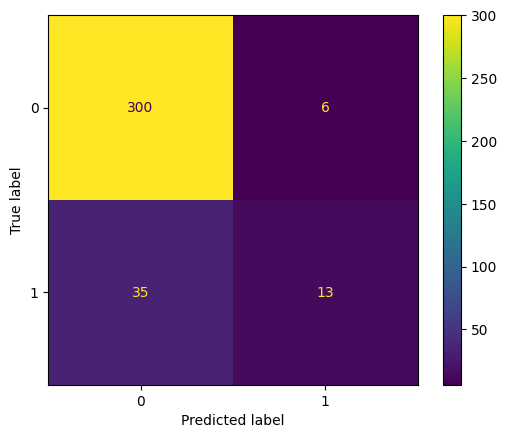

In [125]:
# Matrix de confusion para el modelo 
cm = contingency_matrix(y_test, y_pred_binary)
display = ConfusionMatrixDisplay(confusion_matrix = cm)
display.plot()
plt.show()